#KMR の確率進化動学
利得表から混合戦略ナッシュ均衡を求めて、pの値を算出する関数を設けました。  
ナッシュ均衡を求めるために[Gambit](http://gambit.sourceforge.net/gambit14/index.html)を使っているのでインストールする必要があります。

In [1]:
%matplotlib inline
import kmr
import numpy as np

##(1) Coordination game
###逐次改訂モデル


In [2]:
# 初期設定
payoff = np.array([[[4, 4], [0, 3]],
                                [[3, 0], [2, 2]]])
N = 10
epsilon = 0.01
initials = [0, 2, 4, 6, 8, 10]
T=10**6

In [3]:
# 混合戦略ナッシュ均衡算出
nash = kmr.compute_nash_equilibrium(payoff)
p = nash[1][1]
nash

[<NashProfile for '': [[1.0, 0.0], [1.0, 0.0]]>,
 <NashProfile for '': [[0.6666666667, 0.3333333333], [0.6666666667, 0.3333333333]]>,
 <NashProfile for '': [[0.0, 1.0], [0.0, 1.0]]>]

In [4]:
# KMRクラス
k = kmr.KMR_2x2(p, N, epsilon)

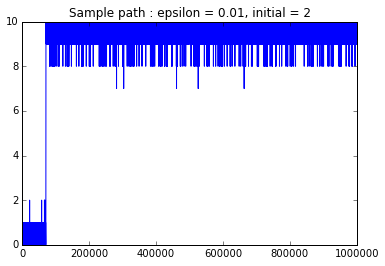

In [5]:
# 推移の一例( initial は ランダムで決定)
k.simulate(T)
k.plot_sample_path()

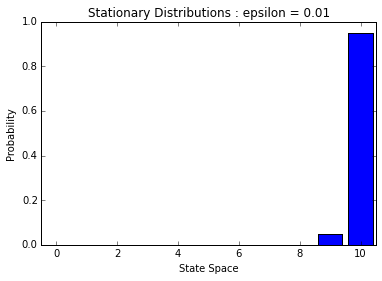

In [6]:
#  定常分布
k.plot_stationary_distribution()

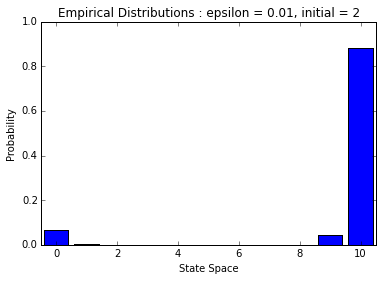

In [7]:
# 頻度分布
k.plot_empirical_distribution()

初期状態を変化させて比べる。

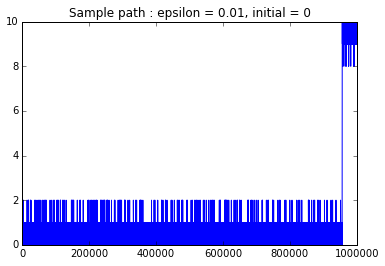

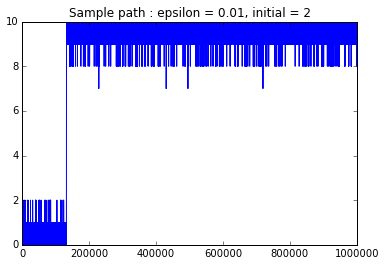

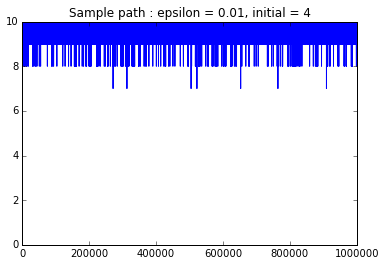

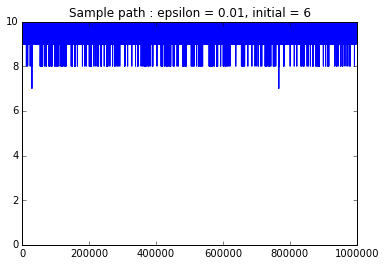

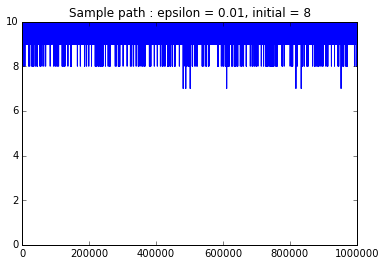

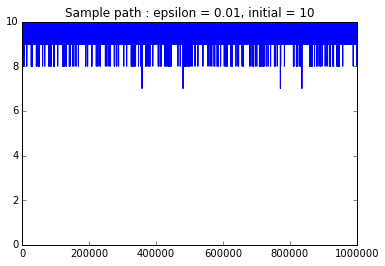

In [8]:
for initial in initials:
    k.simulate(T, initial)
    k.plot_sample_path()

In [9]:
# スピード測定(T=10**6)
%timeit k.simulate(T)

10 loops, best of 3: 63.7 ms per loop


###同時改訂モデル

In [10]:
# 初期設定
payoff = np.array([[[4, 4], [0, 3]],
                                [[3, 0], [2, 2]]])
N = 10
epsilon = 0.01
T=10**6

In [11]:
# KMRクラス
k = kmr.KMR_2x2(p, N, epsilon, True)
k.simulate(T)

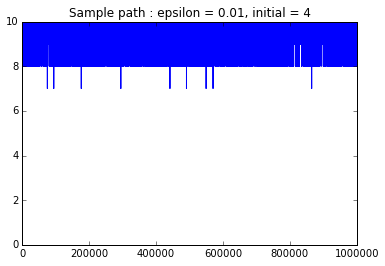

In [12]:
# 推移の一例
k.simulate(T)
k.plot_sample_path()

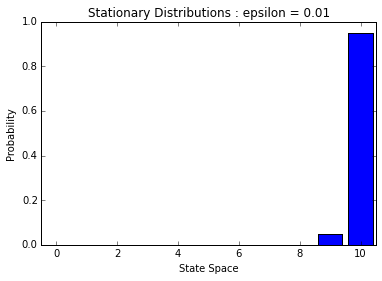

In [13]:
# 定常分布
k.plot_stationary_distribution()

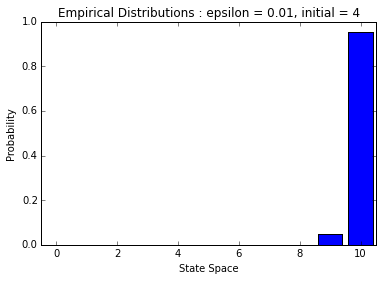

In [14]:
#  頻度分布
k.plot_empirical_distribution()

初期状態を変化せて比べる。

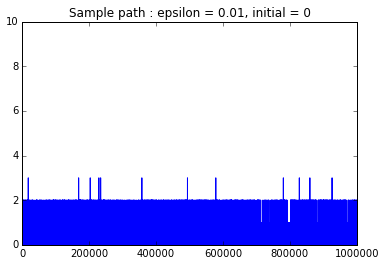

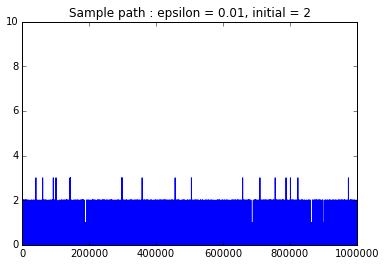

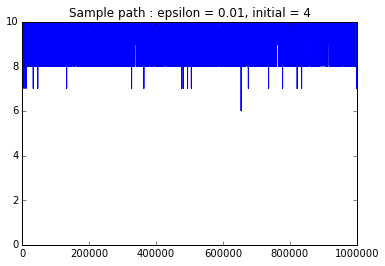

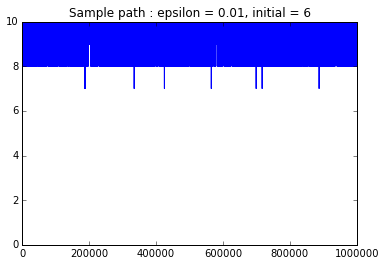

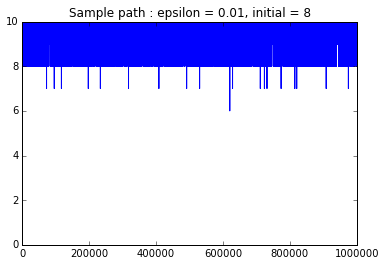

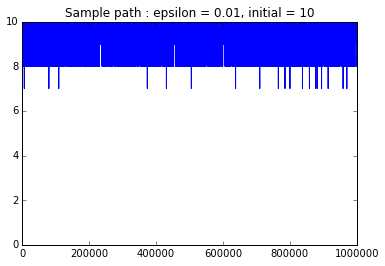

In [15]:
for initial in initials:
    k.simulate(T, initial)
    k.plot_sample_path()

In [16]:
# スピード測定(T=10**6)
%timeit k.simulate(T)

10 loops, best of 3: 60.6 ms per loop


##(2) Young game
###逐次改訂モデル

In [17]:
# 初期設定
payoff = np.array([[6, 0, 0],
                                 [5, 7, 5],
                                 [0, 5, 8]])
N = 10
epsilon = 0.1
initials = [[8, 1, 1], [1, 8, 1], [1, 1, 8], [3, 3, 4]]
T=10**4

In [18]:
# 混合戦略ナッシュ均衡算出
nash = kmr.compute_nash_equilibrium(payoff, same_payoff=True)
nash

[<NashProfile for '': [[1.0, 0.0, 0.0], [1.0, 0.0, 0.0]]>,
 <NashProfile for '': [[0.875, 0.125, 0.0], [0.875, 0.125, 0.0]]>,
 <NashProfile for '': [[0.0, 1.0, 0.0], [0.0, 1.0, 0.0]]>,
 <NashProfile for '': [[0.0, 0.6, 0.4], [0.0, 0.6, 0.4]]>,
 <NashProfile for '': [[0.0, 0.0, 1.0], [0.0, 0.0, 1.0]]>]

In [19]:
k = kmr.KMR_3x3(payoff, N, epsilon)

初期状態をaction0多め、action1多め、action2多め、action0~2同じくらいの人数のパターンで比べてみる。

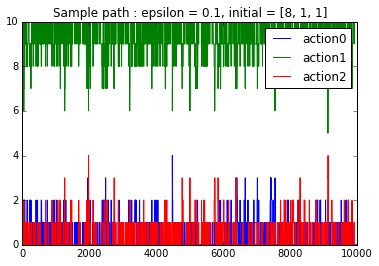

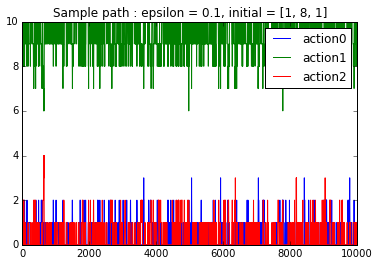

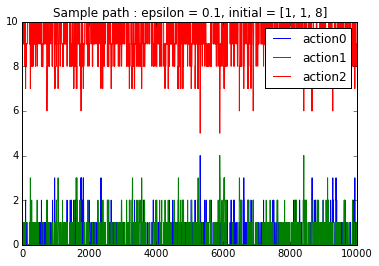

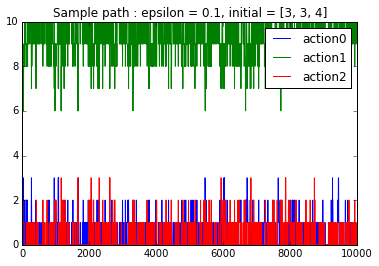

In [20]:
for initial in initials:
    k.simulate(T, initial)
    k.plot_sample_path()

In [21]:
# スピード測定(T=10**4)
%timeit k.simulate(10**4)

1 loops, best of 3: 528 ms per loop
